**02805 Assignment 1**
# Part One: Network Models
## 1. Watts-Strogatz Networks
* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
N, k_e, p = 500, 4, [0, 0.1, 1]
G1 = nx.watts_strogatz_graph(N, k_e, p[0])
G2 = nx.watts_strogatz_graph(N, k_e, p[1])
G3 = nx.watts_strogatz_graph(N, k_e, p[2])

* Calculate the average shortest path length $\langle d \rangle$ for each one. 

In [6]:
dist1 = nx.average_shortest_path_length(G1)
dist2 = nx.average_shortest_path_length(G2)
dist3 = nx.average_shortest_path_length(G3)
print("Average shortest path (G1):", dist1)
print("Average shortest path (G2):", dist2)
print("Average shortest path (G3):", dist3) 

print("<d> =", np.log(N) / np.log(k_e))

Average shortest path (G1): 62.875751503006015
Average shortest path (G2): 7.749779559118236
Average shortest path (G3): 4.775535070140281
<d> = 4.4828921423310435


* Describe what happens to the network when $p = 1$.

Answer: *When the rewiring probability is set to $p = 1$, every edge is rewired. This means the Watts-Strogatz graph loses it’s initial average degree and becomes an Erdos-Renyi random graph.*

*This is best described by plotting the network graphs. As can be seen from the three graphs below, the last graph with $p=1$ has every node connected to 4 other nodes and therefore has the lowest average distance between nodes out of the 3 networks.* 

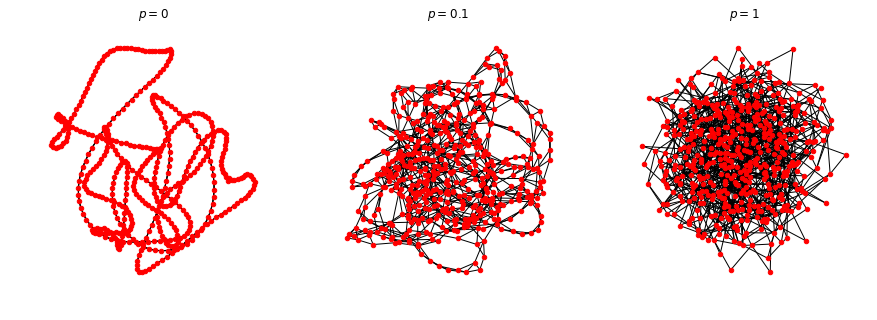

In [7]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title("$p = 0$")
nx.draw(G1, node_size=20)

plt.subplot(1,3,2)
plt.title("$p = 0.1$")
nx.draw(G2, node_size=20)

plt.subplot(1,3,3)
plt.title("$p = 1$")
nx.draw(G3, node_size=20)

plt.show()

* Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [12]:
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
rounds = len(p_values) 
networks, N, k = 50, 500, 4
D_avg = np.zeros((rounds, networks)) # Preallocate memory in matrix
for i in range(rounds):
    for j in range(networks):
        G = nx.watts_strogatz_graph(N, k, p_values[i])
        D_avg[i,j] = nx.average_shortest_path_length(G)

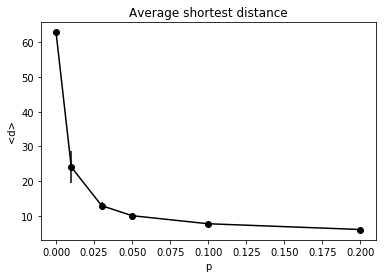

In [14]:
d_mean = np.mean(D_avg, axis=1)
d_std = np.std(D_avg, axis=1)

plt.errorbar(P, d_mean, yerr=d_std, fmt='-o', color="black")
plt.title("Average shortest distance")
plt.xlabel("p")
plt.ylabel("<d>")
plt.show()

## 2. The Barabasi-Albert Model

**Auxiliary functions**

In [18]:
import random

# Converts degree dictionary to numpy array
def degree_array(G, direction="none"):
    if direction == "in":
        return list(dict(G.in_degree()).values())
    elif direction == "out":
        return list(dict(G.out_degree()).values())
    else:
        return list(dict(G.degree()).values())

def flatten_edgelist(G):
    return list(sum(G.edges(), ()))

# Creates a Barabasil-Abert graph given a number of nodes (N)
def BA_graph(N):
    # Create initial two nodes, with one link between them
    G = nx.Graph()
    G.add_edges_from([(0,1)])
    
    # Create the remaining N-2 nodes. Link based on degree
    for node in range(2, N):
        edges = flatten_edgelist(G)
        pick = random.choice(edges)
        G.add_edges_from([(node, pick)])
    
    return G

# Converts a numpy.hist array (edges and counts) to an xy-scatter array.
def hist_to_scatter(degrees):
    v = range(min(degrees), max(degrees)+1)
    hist = np.histogram(degrees, bins=v)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    return freqs, means

# Plots the degree distribution, and the log-log degree distribution,
# as a scatter plots
def scatter_degree_distribution(degrees):
    freqs, means = hist_to_scatter(degrees)
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution")
    plt.show()
    
    plt.loglog(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Log-Log plot of the Degree distribution")
    plt.show()
    
# Returns the average degree of all neighbors, given a graph and a node.
def neighbors_avg_degree(G, node):
    nb = ba_graph_5k.neighbors(node)
    degrees = np.array(list(dict(G.degree(nb)).values()))
    return np.mean(degrees)

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

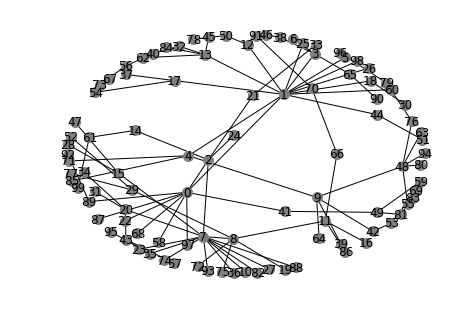

In [19]:
ba_graph_100 = BA_graph(100)
nx.draw(ba_graph_100, with_labels=True, node_color="gray", node_size=100)
plt.show()

* Now create a 5000 node network.

In [20]:
ba_graph_5k = BA_graph(5000)

* What's the maximum and minimum degree? 

In [21]:
degrees_5k = degree_array(ba_graph_5k)

In [22]:
print("maximum =", np.max(degrees_5k))
print("minimum =", np.min(degrees_5k))

maximum = 157
minimum = 1


* Now, bin the degree distribution, for example using numpy.histogram. Plot the distribution. Plot it with both linear and log-log axes.

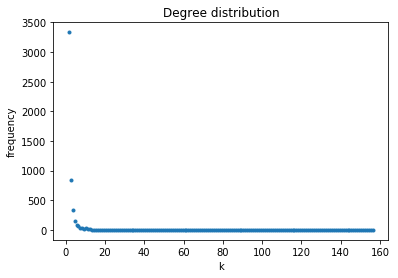

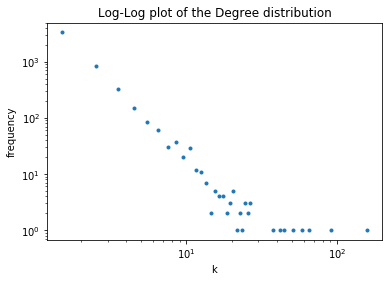

In [23]:
scatter_degree_distribution(degrees_5k)

## 3. Power-laws and the friendship paradox
* Pick a node i at random (e.g. use random.choice). Find its degree.

In [24]:
nodes = list(ba_graph_5k.nodes())
node = random.choice(nodes)
print("degree =", ba_graph_5k.degree(node))

degree = 1


* Find i's neighbors. And calculate their average degree.

In [25]:
k_avg_neighbors = neighbors_avg_degree(ba_graph_5k, node)

* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [26]:
print("Degree of node=", ba_graph_5k.degree(node))
print("Average degree of neighbors:", k_avg_neighbors)

Degree of node= 1
Average degree of neighbors: 4.0


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?


In [27]:
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    k_node = ba_graph_5k.degree(node)
    k_avg_neighbors = neighbors_avg_degree(ba_graph_5k, node)
    if k_node < k_avg_neighbors:
        N += 1
        
print("Friendship paradox holds:", N, "/ 1000 times")

Friendship paradox holds: 843 / 1000 times


# Part Two: The network of American politics

## 4. Basic stats for pages over time
* By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. 

In [28]:
import pandas as pd

In [29]:
url_base = 'https://raw.githubusercontent.com/suneman/socialgraphs2018/master/files/data_US_congress/'
df = pd.read_csv(url_base + 'H113.csv')
df['congress_number'] = 113

df_1 = pd.read_csv(url_base + 'H114.csv')
df_1['congress_number'] = 114

df_2 = pd.read_csv(url_base + 'H115.csv')
df_2['congress_number'] = 115

In [30]:
all_members = pd.concat([df, df_1, df_2]).reset_index(drop=True)

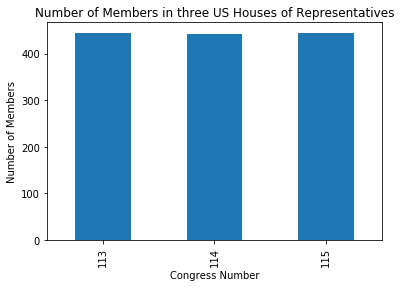

congress_number
113    444
114    442
115    445
dtype: int64


In [31]:
counts = all_members.groupby('congress_number').size()
counts.plot("bar")
plt.xlabel('Congress Number')
plt.ylabel('Number of Members')
plt.title('Number of Members in three US Houses of Representatives')
plt.show()

print(counts)

* Is this development over time what you would expect? Why? Explain in your own words.

Answer: *There is little change in the total number of members over time which is what would
be expected; the number of congress members reflects the US populations of the districts, which states are
divided into. Considering the US population isn’t experiencing rapid growth these years, and the addition
of new districts isn’t that common, then it must be the case that the number of members does not change much over a few years.*

* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

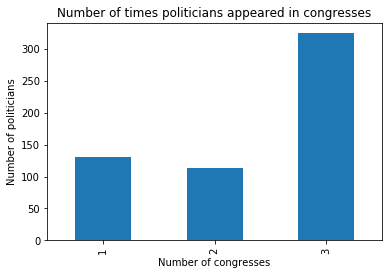

In [32]:
groups = all_members.groupby("WikiPageName")
times_in_congress = groups.size().sort_values()
times_in_congress_count = times_in_congress.groupby(times_in_congress).size()
times_in_congress_count.plot("bar")
plt.title("Number of times politicians appeared in congresses")
plt.xlabel("Number of congresses")
plt.ylabel("Number of politicians")
plt.show()

* Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.

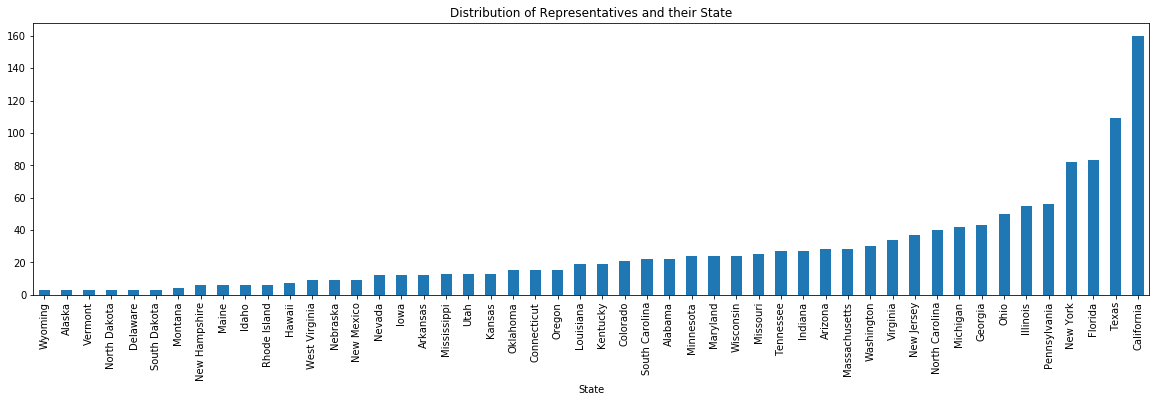

In [33]:
states = all_members.groupby("State")
states_representation = states.size().sort_values()
plt.figure(figsize=[20,5])
states_representation.plot("bar")
plt.title("Distribution of Representatives and their State")
plt.show()

Answer: *The least represented state is Wyoming and the most represented state is California with a lead of about 40 representatives compared to the next-most represented state, Texas.*

* How has the party composition of the house of representative changed over time? Plot your results.


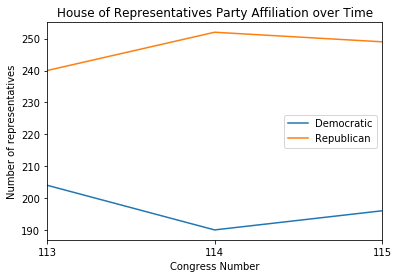

In [34]:
parties = all_members.groupby(["congress_number", "Party"])
parties_count = parties.size()
parties_count.groupby("Party").plot()
plt.legend()
plt.xticks(np.arange(3), [113, 114, 115])
plt.xlabel('Congress Number')
plt.ylabel('Number of representatives')
plt.title('House of Representatives Party Affiliation over Time')
plt.show()

## 5. Basic stats for the network

In [35]:
import re
import io

**Auxiliary Functions**

In [41]:
# Reads a WikiPage txt file, scans it for links to other Wikipages,
# and returns a list of the found links
def get_article_links(name, year):
    # The regex pattern for recognizing links on the form [x | y]
    # and only capturing 'x'.
    article_pattern = r'\[\[([^\]]*?)(?:\|.*?)*\]\]'
    path_folder = './WikiPages/'
    article = io.open(path_folder + name + year + ".txt", 'r', encoding='utf-8').read()
    article_links = re.findall(article_pattern, article)
    article_links = [a.replace(' ', '_') for a in article_links]
    return article_links

# A politcian class for storing data in a neat way.
class Politician:
    def __init__(self, dfRow):
        self.WikiPageName = str(dfRow[0])
        self.Party = str(dfRow[1])
        self.State = str(dfRow[2])
    
    def to_string(self):
        return "Wiki: %s, Party: %s, State: %s" % (self.WikiPageName, self.Party, self.State)
    
    def __hash__(self):
        return hash(self.WikiPageName)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.WikiPageName == other.WikiPageName
               )

# Plots a histogram, given the degrees of a graph.
def distribution_histogram(degrees, text=""):
    v = np.arange(min(degrees), max(degrees)+1)
    plt.figure(figsize=(10,5))
    plt.hist(degrees, bins=v, edgecolor="black")
    plt.title("Degree distribution %s" % text)
    plt.xlabel("Degree (k)")
    plt.ylabel("Frequency (nodes)")
    plt.show()

* Create simple network statistics for the 113th house of representatives.

In [42]:
wikiPageNames = list(df.WikiPageName)
congressGraph = nx.DiGraph()

for index, row in df.iterrows():
    # Create politician node
    p = Politician(row)
    congressGraph.add_node(p)
    
    # Get links
    wikiPage = row[0]
    articleLinks = get_article_links(wikiPage, "2015")
    
    # Create nodes for each politician present as a link, on the current wiki page 
    for link in articleLinks:
        if link in wikiPageNames:
            linkIndex = wikiPageNames.index(link)
            linkRow = df.iloc[linkIndex]
            q = Politician(linkRow)
            congressGraph.add_edge(p, q)

* What is the number of nodes in the network? And the number of links?

In [43]:
print('The number of nodes: %d' % len(congressGraph.nodes()))
print('The number of links: %d' % len(congressGraph.edges()))

The number of nodes: 444
The number of links: 1606


* Plot the in and out-degree distributions.

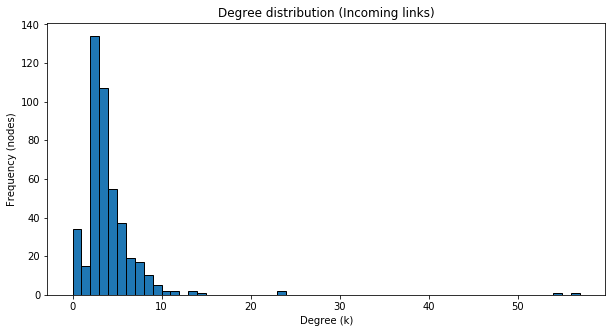

In [44]:
degreesIn = degree_array(congressGraph, direction="in")
distribution_histogram(degreesIn, text="(Incoming links)")

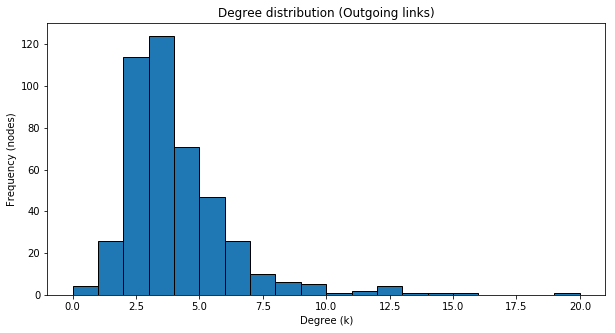

In [45]:
degreesOut = degree_array(congressGraph, direction="out")
distribution_histogram(degreesOut, text="(Outgoing links)")

* Who is the most connected representative?

In [46]:
d = congressGraph.degree()

# Sort by degree, most connected is last element, at index -1
mostConnected = max(d.keys(), key=lambda k: d[k])
print('Most Connected node is {%s}' % mostConnected.to_string())
print('Outgoing:', len(congressGraph.out_edges(mostConnected)))
print('Incoming:', len(congressGraph.in_edges(mostConnected))) 

Most Connected node is {Wiki: Nancy_Pelosi, Party: Democratic, State: California}
Outgoing: 11
Incoming: 57


*We conclude that [Nancy Pelosi](https://en.wikipedia.org/wiki/Nancy_Pelosi) is the most connected representative.*